# Photometric Redshift of Galaxies

## a)
Feature extraction is the task of assessing which features are significant to model the given dataset. Feature extraction can be divided into feature construction and feature selection. Feature construction is constructing all the features that describe the data whereas feature selection is deciding which of these features are significant or relevant. The features selected must be able to collectively accurately describe the data, must effectively be able to predict the next set of data collection and be less expensive computationally. 

In the context of this dataset, it is evident that there are 4 features, each belonging to a particular wavelength namely, u-g,g-r,r-i and i-z. These 4 features are used to perform regression on the two sets of data given to estimate the photometric redshifts of the galaxies statistically.

The required packages are imported as below:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
from astropy.table import Table

## Converting .vot file into .csv


It is easier to read .csv files where each column is a dictionary. Also .vot is more universally used than .vot. Hence here .vot is being converted into .csv. 

In [5]:
tA=Table.read('PhotoZFileA.vot')
tB=Table.read('PhotoZFileB.vot')

In [4]:
# import csv
# with open('PhotoZFileA.csv', 'wb') as f:
#     writer = csv.writer(f)
#     writer.writerows(tA)
    
# with open('PhotoZFileB.csv', 'wb') as f:
#     writer = csv.writer(f)
#     writer.writerows(tB)
    
#http://stackabuse.com/reading-and-writing-csv-files-in-python/

In [6]:
tA.write('PhotoZFileA.csv',overwrite=True)
tB.write('PhotoZFileB.csv',overwrite=True)

In [7]:
ugA=[tA['u-g']]
grA=[tA['g-r']]
riA=[tA['r-i']]
izA=[tA['i-z']]
z_specA=tA['z_spec']

ugB=[tB['u-g']]
grB=[tB['g-r']]
riB=[tB['r-i']]
izB=[tB['i-z']]
z_specB=tB['z_spec']

In [8]:
XA = np.vstack((ugA, grA, riA, izA)).T
XB = np.vstack((ugB, grB, riB, izB)).T

Of these two sets, the first one is taken to be the training set and the second the test set. 

## Plotting raw data (training set)

As plotting gives a faint idea of the data being handled, in an effort to check for any patterns here, the data is plotted for the training set. But since the number of data points is huge, this does not tell us much about the data.  

/Users/malavikavijayendravasist/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


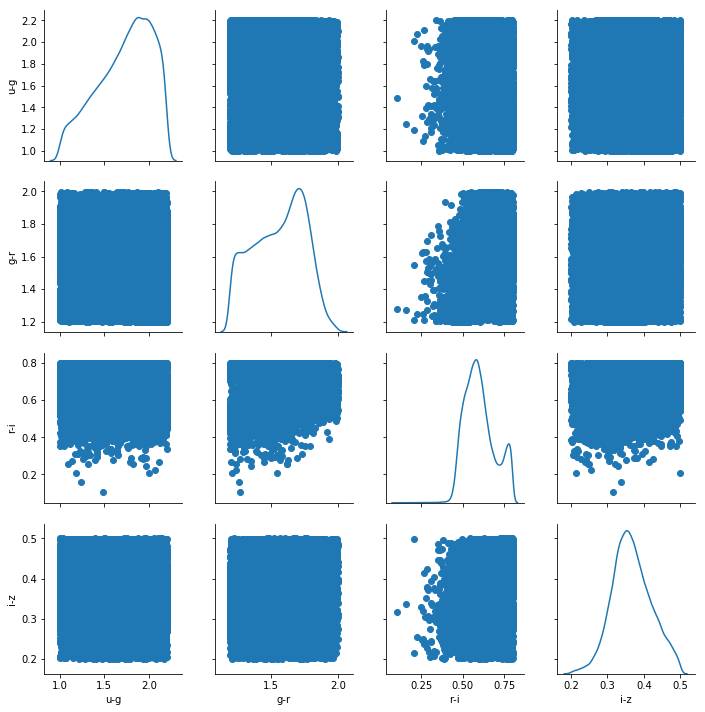

In [9]:
df = pd.DataFrame(XA, columns=['u-g', 'g-r', 'r-i', 'i-z'])
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(plt.scatter)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)

## b) Prediction of Photometric redshifts using Linear Regression 

Linear Regression is used over Lasso and Ridge because this gives the least tarining error. Also the coefficients are sufficiently less and hence regularisation is not necessary. <br>


The training set is trained before it is used to reduce the bias as suggested by the problem sheet. The number of folds is taken to be 5 by convention. To the predicted model by the trained set, the test set is applied and the generalisation error is obtained. 

In [13]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

kf = KFold(n_splits=5)
j=1
for train, test in kf.split(XA):
            x_train = XA[train]
            y_train= z_specA[train]
            x_test = XA[test]
            y_test= z_specA[test]
            LinearReg= LinearRegression(fit_intercept=True)
            res = LinearReg.fit(x_train,y_train)
            z_est = LinearReg.predict(x_test)
            median_train =np.median(abs(z_est-y_test)/(1+y_test))
            print j,":"
            print "training error is :", median_train
            print "Rˆ2 :",LinearReg.score(x_train,y_train)
            print "intercept is : ", LinearReg.intercept_
            print "the coefficients of the fit are: ", LinearReg.coef_
            
            z_estB = LinearReg.predict(XB)
            median_trainB =np.median(abs(z_estB-z_specB)/(1+z_specB))
            print "generalisation error is ", median_trainB
            j+=1

1 :
training error is : 0.0152035390976
Rˆ2 : 0.772738773182
intercept is :  -0.22289138891
the coefficients of the fit are:  [-0.02558786  0.11659748  0.67506641  0.00336796]
generalisation error is  0.015156971496
2 :
training error is : 0.0144620329545
Rˆ2 : 0.766905625546
intercept is :  -0.22042711131
the coefficients of the fit are:  [-0.02642282  0.11579633  0.67301541  0.00735718]
generalisation error is  0.0151699789005
3 :
training error is : 0.0147754956634
Rˆ2 : 0.769907465976
intercept is :  -0.222209948502
the coefficients of the fit are:  [-0.02592871  0.11580501  0.67458606  0.0073301 ]
generalisation error is  0.0151676828116
4 :
training error is : 0.0147983112779
Rˆ2 : 0.766404863382
intercept is :  -0.218080828143
the coefficients of the fit are:  [-0.0272374   0.11506924  0.67060121  0.01282819]
generalisation error is  0.0152020021571
5 :
training error is : 0.0166327438371
Rˆ2 : 0.772592692147
intercept is :  -0.206286596888
the coefficients of the fit are:  [-0.

Observations: <br>
1) The training error and the generalisation error is comparable. <br>
2) The generalisation error is almost constant, which means the variance is reduced. <br>
3) Rˆ2 of the prediction is high implying that the data does have a linear relation.

Reference: <br>
1) https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/<br>
2) http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## c)
The error estimated on the training sample is not a reliable estimate of the generalisation error of an estimator because the training error is biased to the specific training sample. It would have a low bias but a very high variance. In order to make the model more generic and flexible to accomodate new data, the k-fold technique is used. 

## d) Prediction of Photometric redshifts using KNN regression 


The same procedure as above is followed for KNN regression. 

In [9]:
from sklearn import neighbors
kf = KFold(n_splits=5)

for train, test in kf.split(XA):
            x_train = XA[train]
            y_train= z_specA[train]
            x_test = XA[test]
            y_test= z_specA[test]
            k=10
            knn=neighbors.KNeighborsRegressor(k)
            res = knn.fit(x_train,y_train)
            z_est = knn.predict(x_test)
            median_train =np.median(abs(z_est-y_test)/(1+y_test))
            print "training error is ", median_train
                        
            z_estB = knn.predict(XB)
            median_trainB =np.median(abs(z_estB-z_specB)/(1+z_specB))
            print "generalisation error is ", median_trainB

training error is  0.0128067981245
generalisation error is  0.0127526173097
training error is  0.0119670744642
generalisation error is  0.0127492219183
training error is  0.0124413986317
generalisation error is  0.0127421880415
training error is  0.0122566780161
generalisation error is  0.0128166570847
training error is  0.013847748179
generalisation error is  0.0127645538283


Observations: <br>
1) The generalisation error as seen here is lower than in Linear Regression.


The same attempted without training the data: 

In [13]:
k=3
knn=neighbors.KNeighborsRegressor(k)
res=knn.fit(XA,z_specA)
z=knn.predict(XA)
median=np.median(abs((z-z_specA)/(1+z_specA)))
print 'The median for KNN is ',median

z_estB = knn.predict(XB)
median_trainB =np.median(abs(z_estB-z_specB)/(1+z_specB))
print "generalisation error is ", median_trainB

    

The median for KNN is  0.00989919336545
generalisation error is  0.0141778144542


This shows:<br>
1) The training error is very low. This shows the flexibility of the KNN. <br>
2) The generalisation error is very high in comparision. This implies that the data is over-fit.<br>
3) This also shows the role of training the data in reducing the bias and variance. 

Dis-Advantages of K Nearest Neighbour technique: <br>
1) It is too flexible hence is prone to over-fitting <br>
2) It is computationally and memory-wise expensive. <br>
3) Takes a long time to compute hence very slow for large datasets. 